# Lesson 7 Assignment - KMeans
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions
1. Short narrative on the data preparation for your chosen data set for Milestone 3, which in most cases should be the same as Milestone 2.
    - number of observations and attributes
    - datatype, distribution, and a comment on each attribute
    - Source citation for your data set
    - Ask at least 1 yes-no or binary-choice question (Does it...? Is it...?)
    - Ask at least 1 non-binary question (What is...? How many...? When does...?)
2. Perform a K-Means with sklearn using some or all of your attributes.
3. Include at least one categorical column and one numeric attribute.
4. Normalize the attributes prior to K-Means.
5. Add the cluster label to the dataset.
6. Add comments to explain the code blocks.
7. Add a summary comment block that describes the cluster labels.

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore") # To suppress warning for violin plots when python version is < 3.7

%matplotlib inline

In [10]:
# Adult Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Adults = pd.read_csv(url, header=None)

# Find proper column names here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Adults.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country', 'income']

# Declare Functions

In [11]:
# Function to replace missing numeric values
def cleanData(x, col):
    # We determine the locations of the question marks
    QuestionMark = x.loc[:, col].astype(str) == "?"
    # If there are question marks
    if sum(QuestionMark) > 0:
        # Convert the current column to numeric data including nans
        x.loc[:, col] = pd.to_numeric(x, errors='coerce')
        # Get the Nan array from the current column
        HasNan = np.isnan(x.loc[:, col]) 
        # Calculate the Median for current column without Nan
        Median = np.nanmedian(x.loc[:, col])
        # Replace the missing value with Median
        x.loc[HasNan, col] = Median
    return x.loc[:, col]

In [12]:
# Function to bin the data
def bin(x, b): # x = data array, b = boundaries array
    nb = len(b)
    N = len(x)
    y = np.empty(N, float) # empty float array to store the bin numbers (output)
    
    for i in range(1, nb): # repeat for each pair of bin boundaries
        y[(x >= b[i-1])&(x < b[i])] = i
    
    y[x == b[-1]] = nb - 1 # ensure that the borderline cases are also binned appropriately 
    # (Negative numbers mean that you count from the right instead of the left. So, list[-1] refers to the last element)
    return y

In [13]:
# Normalize numeric values using Z-Normalize
for col in ['fnlwgt', 'capital-gain', 'capital-loss']:
    # Replace missing values with Median for current column without Nan
    Adults.loc[:, col] = cleanData(Adults, col).astype(float)
    X = pd.DataFrame(Adults.loc[:,col])
    # Normalization numeric data using Z-Normalize by scikit library
    standardization_scale = sk.StandardScaler().fit(X)
    z = standardization_scale.transform(X)
    Adults.loc[:,col] = z

# Code

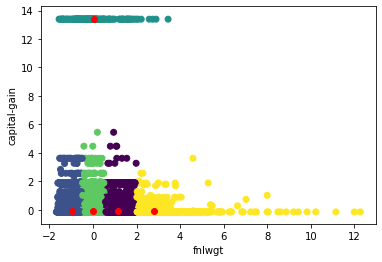

In [14]:
#Bin numeric values using Equal-width Binning
NB = 5 # number of bins

for col in ['age', 'hours-per-week']:
    # Replace missing values with Median for current column without Nan
    Adults.loc[:, col] = cleanData(Adults, col)
    # To obtaining the boundaries of the bins
    bounds = np.linspace(np.min(Adults.loc[:, col]), np.max(Adults.loc[:, col]), NB + 1) 
    # Get the bin data
    bx = bin(Adults.loc[:, col].values, bounds)
    Adults.loc[:, col] = bx
    
# Impute missing categories
# Trim string (some daata has ? with spaces)
Adults.replace('(^\s+|\s+$)', '', regex=True, inplace=True)
    
MissingValue = Adults.loc[:, "workclass"] == "?"
Adults.loc[MissingValue, "workclass"] = "Private"

MissingValue = Adults.loc[:, "occupation"] == "?"
Adults.loc[MissingValue, "occupation"] = "Other-service"

MissingValue = Adults.loc[:, "native-country"] == "?"
Adults.loc[MissingValue, "native-country"] = "Unknown"

# Decode education-num column (categorical data)
Adults.loc[:,'education-num'] = Adults.loc[:,'education-num'].astype(str)
# Get the distinct list of existing education-num values
educationNumList = np.sort(Adults.loc[:, 'education-num'].unique())
# Dictionary to decode Categorical data
educationDict = {"1": "Preschool", "2": "1st-4th","3": "5th-6th","4": "7th-8th", "5": "9th", "6": "10th","7": "11th","8": "12th","9": "HS-grad","10": "Some-college", "11": "Assoc-voc", "12": "Assoc-acdml","13": "Bachelors", "14": "Masters","15": "Prof-school", "16": "Doctorate"}

# Loop through all the Categorical data of education-num column 
for num in educationNumList:
    Replace = Adults.loc[:, 'education-num'] == num
    # Decode
    Adults.loc[Replace, 'education-num'] = educationDict.get(num, "")

# One-hot encode categorical data
Adults.loc[:, "Female"] = (Adults.loc[:, "sex"] == "Female").astype(int)
Adults.loc[:, "Male"] = (Adults.loc[:, "sex"] == "Male").astype(int)
Adults.loc[:, "income<=50K"] = (Adults.loc[:, "income"] == "<=50K").astype(int)
Adults.loc[:, "income>50K"] = (Adults.loc[:, "income"] == ">50K").astype(int)
    
# Remove obsolete column
Adults = Adults.drop("education", axis=1)
Adults = Adults.drop("sex", axis=1)
Adults = Adults.drop("income", axis=1)

***
**Summary:** 
1. There are 32, 561 observations and 16 attributes on this data set
2. After run Adults.dtypes, and plot histrogram (to observed the distribution) for each attributes
    - float64: age, fnlwgt, capital-gain, capital-loss, hours-per-week
    - object: workclass, education-num, marital-status, occupation, relationship, race, native-country
    - int64: Female, Male, income<=50K, income>50K
    - All of the attribuyes are skewed distribution.
3. Is the adult male or female per the particular correspondent's record? (look at Female or Male to check which one has value = 1)
4. What is the native country per the particular correspondent's record? (look at native-country to check the value)
***

In [ ]:
# Perform K-Means with sklearn using fnlwgt & capital-gain attributes
# Note: these two attributes have been normalized using Z-Normalize from above script
k = 5
X = pd.DataFrame(Adults,columns=['fnlwgt', 'capital-gain']) # generated a new data frame for k-means
kmeans = KMeans(n_clusters=k).fit(X)
Labels = kmeans.labels_ # get Labels of each point
ClusterCentroids = kmeans.cluster_centers_ # get coordinates of cluster centers

# Add the cluster label to the dataset
Adults.loc[:, "cluster_label_fnlwgt_capital-gain"] = Labels

# Plot scatter between fnlwgt(x-axis) and capital-gain (y-axis)
plt.scatter(X.loc[:, 'fnlwgt'], X.loc[:, 'capital-gain'], c=kmeans.labels_.astype(float))
# Plot Centroids
plt.scatter(ClusterCentroids[:, 0], ClusterCentroids[:, 1], c='red')
plt.xlabel('fnlwgt')
plt.ylabel('capital-gain')
plt.show()